In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv("../data/dataset.csv")
data.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [6]:
data.columns

Index(['CATEGORY', 'MESSAGE', 'FILE_NAME'], dtype='object')

<Axes: xlabel='CATEGORY', ylabel='count'>

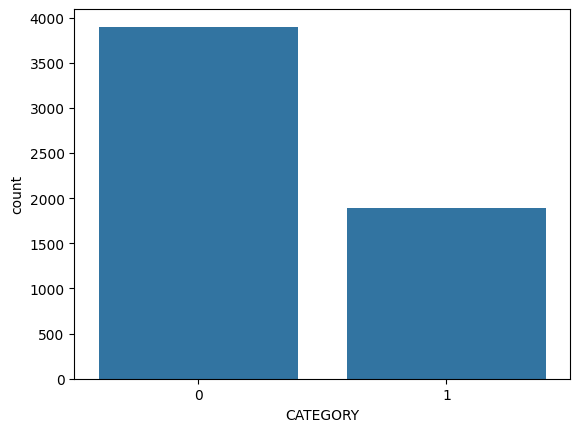

In [14]:
sns.countplot(data, x="CATEGORY")

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [26]:
tfidf = TfidfVectorizer()
X = data.MESSAGE
y = data.CATEGORY
tfidf_features = tfidf.fit_transform(data.MESSAGE)
tfidf_features.shape

(5796, 103002)

In [28]:
tfidf_features.todense()[:2]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
model_MNB = MultinomialNB().fit(tfidf_features, y)

In [32]:
MNB_pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("model", MultinomialNB())
    ]
)

In [34]:
MNB_pipeline.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

In [42]:
accuracy_score(y, MNB_pipeline.predict(X))

0.9177018633540373

In [43]:
MNB_pipeline.predict(["You have to buy this product right now, or you will lose an opportunity"])

array([1])